# Price & Block Data

In [1]:
# Data Analysis Packages
from sklearn import preprocessing
import pandas as pd
import numpy as np
import pickle as pk

In [2]:
# Graphing Packages
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Import and Save Data

### Bitcoin Block Data (from Prof. Zhang)

In [5]:
# Import BTC Dataset given to us by Prof. Zhang
file_location = '..\\dataset.csv'
btc_block_data = pd.read_csv(file_location,low_memory=False)

# Save the data as a pickled pandas dataframe
pk.dump(btc_block_data, open( "binary\\og_block_data.p", "wb" ))

### Crypto Price Data (from Yahoo Finance)

In [87]:
# Import yfinance package
import yfinance as yf
crypto_price = yf.download("BTC-USD ETH-USD DOGE-USD BNB-USD LTC-USD", start="2009-01-01", end="2021-01-19",interval = "1d")

# Save price data as pickled pandas datafame and .csv file
pk.dump(crypto_price, open( "binary\\og_price_data.p", "wb" ) )
crypto_price.to_csv("csv\\og_price_data.csv")

[*********************100%***********************]  5 of 5 completed


### Check that everything was imported and saved successfully

In [7]:
# Bitcoin block data
pk.load(open("binary\\og_block_data.p", "rb"))

,height,host,volume,stripped_size,size,weight,avg_trans_fee_per_trans,block_reward,block_reward_tips,time
0,0,unknown,1,285,285,1140,0.000000,50.00,0.000000,3/1/2009 18:15
1,1,unknown,1,215,215,860,0.000000,50.00,0.000000,9/1/2009 2:54
2,2,unknown,1,215,215,860,0.000000,50.00,0.000000,9/1/2009 2:55
3,3,unknown,1,215,215,860,0.000000,50.00,0.000000,9/1/2009 3:02
4,4,unknown,1,215,215,860,0.000000,50.00,0.000000,9/1/2009 3:16
...,...,...,...,...,...,...,...,...,...,...
666611,666594,ViaBTC,1968,881571,1348518,3993231,0.000239,6.25,0.953732,18/1/2021 10:29
666612,666595,Foundry,2474,893448,1312647,3992991,0.000160,6.25,0.637013,18/1/2021 10:33
666613,666596,F2Pool,1896,819022,1541514,3998580,0.000123,6.25,0.493446,18/1/2021 10:41
666614,666597,Huobi.pool,2192,912273,1256245,3993064,0.000040,6.25,0.158978,18/1/2021 10:40


In [91]:
# BTC-USD price data
pk.load(open("binary\\og_price_data.p", "rb"))

Open                                                   \
              BNB-USD       BTC-USD  DOGE-USD      ETH-USD     LTC-USD   
Date                                                                     
2014-09-17        NaN    465.864014       NaN          NaN    5.085890   
2014-09-18        NaN    456.859985       NaN          NaN    5.065430   
2014-09-19        NaN    424.102997       NaN          NaN    4.687290   
2014-09-20        NaN    394.673004       NaN          NaN    4.329200   
2014-09-21        NaN    408.084991       NaN          NaN    4.263070   
...               ...           ...       ...          ...         ...   
2021-01-14  40.118828  37325.109375  0.008619  1130.231201  147.379745   
2021-01-15  41.794952  39156.707031  0.009389  1221.877197  152.111526   
2021-01-16  40.919434  36821.648438  0.009367  1171.443115  144.188187   
2021-01-17  43.156139  36163.648438  0.009263  1233.453369  144.224838   
2021-01-18  45.767532  35792.238281  0.009070  1230.313232  142.434647   

                 Volume                                                      
                BNB-USD      BTC-USD     DOGE-USD       ETH-USD     LTC-USD  
Date                                                                         
2014-09-17          NaN     21056800          NaN           NaN     3071840  
2014-09-18          NaN     34483200          NaN           NaN     4569260  
2014-09-19          NaN     37919700          NaN           NaN     3917450  
2014-09-20          NaN     36863600          NaN           NaN     5490660  
2014-09-21          NaN     26580100          NaN           NaN     2931220  
...                 ...          ...          ...           ...         ...  
2021-01-14  534108764.0  63615990033  428369039.0  3.341092e+10  8271411810  
2021-01-15  562019413.0  67760757881  398965925.0  3.597204e+10  8416625031  
2021-01-16  604218252.0  57706187875  258630480.0  3.231924e+10  7183807955  
2021-01-17  664875513.0  52359854336  254487989.0  2.925803e+10  6098835633  
2021-01-18  586905636.0  49511702429  205025648.0  2.581746e+10  6640211538  

[2316 rows x 10 columns]

In [ ]:
# Create subplots
fig, ax = plt.subplots()
line1, = ax.plot(block_and_search_scaled['Bitcoin'].truncate(before=list(block_and_search_scaled.index)[14]), label="BTC")
# line2, = ax.plot(block_and_search_scaled['Ethereum'].truncate(before=list(block_and_search_scaled.index)[14]), label="ETH")
line3, = ax.plot(block_and_search_scaled['size'].truncate(before=list(block_and_search_scaled.index)[14]), label="Size")
# line4, = ax.plot(block_and_search_scaled['stripped_size'].truncate(before=list(block_and_search_scaled.index)[14]), label="Stripped Size")

# Create a legend for the plot
first_legend = ax.legend(handles=[line1,line3], loc='upper left')

# Add the legend manually to the Axes.
ax.add_artist(first_legend)

# Label the x and y axis
plt.xlabel("Date")
plt.ylabel("Relative Interest")

# Add a title to the plot
plt.title("Block & Search Data Over Time")

# Resize the plot
plt.rcParams["figure.figsize"] = (20,12)

# Save the plot
# plt.savefig("plots\\crypto_iot.jpg", dpi = 300)

# Show the plot
plt.show()

### Import the original dataset

In [89]:
# Bitcoin block data
og_block_data = pk.load(open("binary\\og_block_data.p", "rb"))
# Crypto search data
og_price_data = pk.load(open("binary\\og_price_data.p", "rb"))

In [90]:
for i in og_price_data.columns:
    if i !=  ('Open', 'BNB-USD') and i !=  ('Open', 'BTC-USD') and i !=  ('Open', 'DOGE-USD') and i != ('Open', 'ETH-USD') and i !=  ('Open', 'LTC-USD') and i != ('Volume', 'BNB-USD') and i != ('Volume', 'BTC-USD') and i != ('Volume', 'DOGE-USD') and i != ('Volume', 'ETH-USD') and i != ('Volume', 'LTC-USD'):
        og_price_data.drop(i,inplace=True,axis='columns')
og_price_data
pk.dump(og_price_data, open("binary\\og_price_data.p", "wb"))

### Match the date range for both datasets

In [12]:
# Match the indexes
dic = {}
for i in list(og_block_data.index):
    lst = [ ]
    for k in [og_block_data[c][i] for c in og_block_data.columns]:
        if type(k) == str:
            key = k.split(" ")[0]
        else:
            lst.append(k)
            
    if key not in dic.keys():
        dic[key] = lst
        
# Convert back to dataframe and rename columns
block_data_new = pd.DataFrame.from_dict(data=dic, orient='index', columns=['Height', 'Trans Volume', 'Stripped Size', 'Size', 'Weight', 'Avg. Transaction Fee', 'Block Reward', 'Block Reward Tips' ])

# Truncate the data and match indexes
block_data_new = block_data_new.reset_index()
block_data_new = block_data_new.truncate(before=2078)
block_data_new = block_data_new.set_index(og_price_data.index)

# Save the dataframe
pk.dump(block_data_new,open("binary\\block_data_new.p", "wb"))
# block_data_new

### Check that the data was cleaned and saved correctly

In [92]:
pk.load(open("binary\\block_data_new.p", "rb"))

,index,Height,Trans Volume,Stripped Size,Size,Weight,Avg. Transaction Fee,Block Reward,Block Reward Tips
Date,,,,,,,,,
2014-09-17,17/9/2014,321059,1092,603041,603041,2412164,0.000068,25.00,0.164946
2014-09-18,18/9/2014,321245,350,143076,143076,572304,0.000087,25.00,0.049661
2014-09-19,19/9/2014,321424,396,235727,235727,942908,0.000066,25.00,0.062611
2014-09-20,20/9/2014,321595,919,629794,629794,2519176,0.000065,25.00,0.162859
2014-09-21,21/9/2014,321771,1113,505590,505590,2022360,0.000077,25.00,0.155930
...,...,...,...,...,...,...,...,...,...
2021-01-14,14/1/2021,665946,1476,940052,1173270,3993426,0.000351,6.25,1.400926
2021-01-15,15/1/2021,666093,1752,886871,1332694,3993307,0.000357,6.25,1.425750
2021-01-16,16/1/2021,666248,2722,834008,1491318,3993342,0.000354,6.25,1.413416


In [93]:
pk.load(open("binary\\og_price_data.p", "rb"))

Open                                                   \
              BNB-USD       BTC-USD  DOGE-USD      ETH-USD     LTC-USD   
Date                                                                     
2014-09-17        NaN    465.864014       NaN          NaN    5.085890   
2014-09-18        NaN    456.859985       NaN          NaN    5.065430   
2014-09-19        NaN    424.102997       NaN          NaN    4.687290   
2014-09-20        NaN    394.673004       NaN          NaN    4.329200   
2014-09-21        NaN    408.084991       NaN          NaN    4.263070   
...               ...           ...       ...          ...         ...   
2021-01-14  40.118828  37325.109375  0.008619  1130.231201  147.379745   
2021-01-15  41.794952  39156.707031  0.009389  1221.877197  152.111526   
2021-01-16  40.919434  36821.648438  0.009367  1171.443115  144.188187   
2021-01-17  43.156139  36163.648438  0.009263  1233.453369  144.224838   
2021-01-18  45.767532  35792.238281  0.009070  1230.313232  142.434647   

                 Volume                                                      
                BNB-USD      BTC-USD     DOGE-USD       ETH-USD     LTC-USD  
Date                                                                         
2014-09-17          NaN     21056800          NaN           NaN     3071840  
2014-09-18          NaN     34483200          NaN           NaN     4569260  
2014-09-19          NaN     37919700          NaN           NaN     3917450  
2014-09-20          NaN     36863600          NaN           NaN     5490660  
2014-09-21          NaN     26580100          NaN           NaN     2931220  
...                 ...          ...          ...           ...         ...  
2021-01-14  534108764.0  63615990033  428369039.0  3.341092e+10  8271411810  
2021-01-15  562019413.0  67760757881  398965925.0  3.597204e+10  8416625031  
2021-01-16  604218252.0  57706187875  258630480.0  3.231924e+10  7183807955  
2021-01-17  664875513.0  52359854336  254487989.0  2.925803e+10  6098835633  
2021-01-18  586905636.0  49511702429  205025648.0  2.581746e+10  6640211538  

[2316 rows x 10 columns]

### Concatenate Price and Block Data

In [106]:
# Load in pickled data
block_data_new =  pk.load(open("binary\\block_data_new.p", "rb"))
og_price_data = pk.load(open("binary\\og_price_data.p", "rb"))

# Concatenate the data
price_and_block_concat = pd.concat([og_price_data,block_data_new],axis=1)
# price_and_block_concat = price_and_block_concat.drop(['Height','Close','Adj Close','Low','High','index'],axis=1)
price_and_block_concat['Time'] = [i for i in range(len(price_and_block_concat.index))]

# price_and_block_concat = price_and_block_concat.rename(columns={('Open', 'BTC-USD'): "BTC-USD Price", ('Volume', 'BTC-USD'): "BTC-USD Volume"})
price_and_block_concat.drop('index',inplace=True,axis='columns')


# Save the dataframe
pk.dump(price_and_block_concat,open("binary\\price_and_block_concat_additional.p", "wb"))

# Show the dataframe
price_and_block_concat

,"(Open, BNB-USD)","(Open, BTC-USD)","(Open, DOGE-USD)","(Open, ETH-USD)","(Open, LTC-USD)","(Volume, BNB-USD)","(Volume, BTC-USD)","(Volume, DOGE-USD)","(Volume, ETH-USD)","(Volume, LTC-USD)",Height,Trans Volume,Stripped Size,Size,Weight,Avg. Transaction Fee,Block Reward,Block Reward Tips,Time
Date,,,,,,,,,,,,,,,,,,,
2014-09-17,NaN,465.864014,NaN,NaN,5.085890,NaN,21056800,NaN,NaN,3071840,321059,1092,603041,603041,2412164,0.000068,25.00,0.164946,0
2014-09-18,NaN,456.859985,NaN,NaN,5.065430,NaN,34483200,NaN,NaN,4569260,321245,350,143076,143076,572304,0.000087,25.00,0.049661,1
2014-09-19,NaN,424.102997,NaN,NaN,4.687290,NaN,37919700,NaN,NaN,3917450,321424,396,235727,235727,942908,0.000066,25.00,0.062611,2
2014-09-20,NaN,394.673004,NaN,NaN,4.329200,NaN,36863600,NaN,NaN,5490660,321595,919,629794,629794,2519176,0.000065,25.00,0.162859,3
2014-09-21,NaN,408.084991,NaN,NaN,4.263070,NaN,26580100,NaN,NaN,2931220,321771,1113,505590,505590,2022360,0.000077,25.00,0.155930,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-14,40.118828,37325.109375,0.008619,1130.231201,147.379745,534108764.0,63615990033,428369039.0,3.341092e+10,8271411810,665946,1476,940052,1173270,3993426,0.000351,6.25,1.400926,2311
2021-01-15,41.794952,39156.707031,0.009389,1221.877197,152.111526,562019413.0,67760757881,398965925.0,3.597204e+10,8416625031,666093,1752,886871,1332694,3993307,0.000357,6.25,1.425750,2312
2021-01-16,40.919434,36821.648438,0.009367,1171.443115,144.188187,604218252.0,57706187875,258630480.0,3.231924e+10,7183807955,666248,2722,834008,1491318,3993342,0.000354,6.25,1.413416,2313


In [161]:
price_and_block_concat_describe = price_and_block_concat.describe()
price_and_block_concat_describe.to_csv("csv\\price_and_block_concat_describe.csv")

In [105]:
# Load in pickled data
block_data_new =  pk.load(open("binary\\block_data_new.p", "rb"))
og_price_data = pk.load(open("binary\\og_price_data.p", "rb"))

for i in og_price_data.columns:
    if i != ('Open', 'BTC-USD') and i != ('Volume', 'BTC-USD'):
        og_price_data.drop(i,inplace=True,axis='columns')
        
# Concatenate the data
price_and_block_concat = pd.concat([og_price_data,block_data_new],axis=1)
# price_and_block_concat = price_and_block_concat.drop(['Height','Close','Adj Close','Low','High','index'],axis=1)
price_and_block_concat['Time'] = [i for i in range(len(price_and_block_concat.index))]

price_and_block_concat = price_and_block_concat.rename(columns={('Open', 'BTC-USD'): "BTC-USD Price", ('Volume', 'BTC-USD'): "BTC-USD Volume"})
price_and_block_concat.drop('index',inplace=True,axis='columns')


# Save the dataframe
pk.dump(price_and_block_concat,open("binary\\price_and_block_concat.p", "wb"))

# Show the dataframe
price_and_block_concat

,BTC-USD Price,BTC-USD Volume,Height,Trans Volume,Stripped Size,Size,Weight,Avg. Transaction Fee,Block Reward,Block Reward Tips,Time
Date,,,,,,,,,,,
2014-09-17,465.864014,21056800,321059,1092,603041,603041,2412164,0.000068,25.00,0.164946,0
2014-09-18,456.859985,34483200,321245,350,143076,143076,572304,0.000087,25.00,0.049661,1
2014-09-19,424.102997,37919700,321424,396,235727,235727,942908,0.000066,25.00,0.062611,2
2014-09-20,394.673004,36863600,321595,919,629794,629794,2519176,0.000065,25.00,0.162859,3
2014-09-21,408.084991,26580100,321771,1113,505590,505590,2022360,0.000077,25.00,0.155930,4
...,...,...,...,...,...,...,...,...,...,...,...
2021-01-14,37325.109375,63615990033,665946,1476,940052,1173270,3993426,0.000351,6.25,1.400926,2311
2021-01-15,39156.707031,67760757881,666093,1752,886871,1332694,3993307,0.000357,6.25,1.425750,2312
2021-01-16,36821.648438,57706187875,666248,2722,834008,1491318,3993342,0.000354,6.25,1.413416,2313


### Calculate the correlation between the data points

In [101]:
# Load binary files
price_and_block_concat  = pk.load(open("binary\\price_and_block_concat.p", "rb"))


# Show Correlation
price_and_block_corr = price_and_block_concat.corr(method='pearson')

# Saved the dataset
pk.dump(price_and_block_corr, open("binary\\price_and_block_corr.p", "wb" ))

# Show the dataset
price_and_block_corr

,BTC-USD Price,BTC-USD Volume,Height,Trans Volume,Stripped Size,Size,Weight,Avg. Transaction Fee,Block Reward,Block Reward Tips,Time
BTC-USD Price,1.000000,0.786681,0.779619,0.287412,0.191818,0.506429,0.303707,0.191395,-0.670015,0.217569,0.779904
BTC-USD Volume,0.786681,1.000000,0.775098,0.282685,0.156299,0.520251,0.283037,0.009561,-0.556844,0.037992,0.777396
Height,0.779619,0.775098,1.000000,0.451383,0.316389,0.701463,0.456693,0.035795,-0.859325,0.075787,0.999971
Trans Volume,0.287412,0.282685,0.451383,1.000000,0.704247,0.755034,0.750000,0.198227,-0.421219,0.263599,0.451108
Stripped Size,0.191818,0.156299,0.316389,0.704247,1.000000,0.821301,0.982057,0.283066,-0.395321,0.368705,0.316765
Size,0.506429,0.520251,0.701463,0.755034,0.821301,1.000000,0.914152,0.127659,-0.628276,0.210854,0.701923
Weight,0.303707,0.283037,0.456693,0.750000,0.982057,0.914152,1.000000,0.243336,-0.488587,0.331689,0.457113
Avg. Transaction Fee,0.191395,0.009561,0.035795,0.198227,0.283066,0.127659,0.243336,1.000000,-0.241651,0.985399,0.035811
Block Reward,-0.670015,-0.556844,-0.859325,-0.421219,-0.395321,-0.628276,-0.488587,-0.241651,1.000000,-0.275866,-0.858966
Block Reward Tips,0.217569,0.037992,0.075787,0.263599,0.368705,0.210854,0.331689,0.985399,-0.275866,1.000000,0.075822


### Visualize the correlation as a heat map

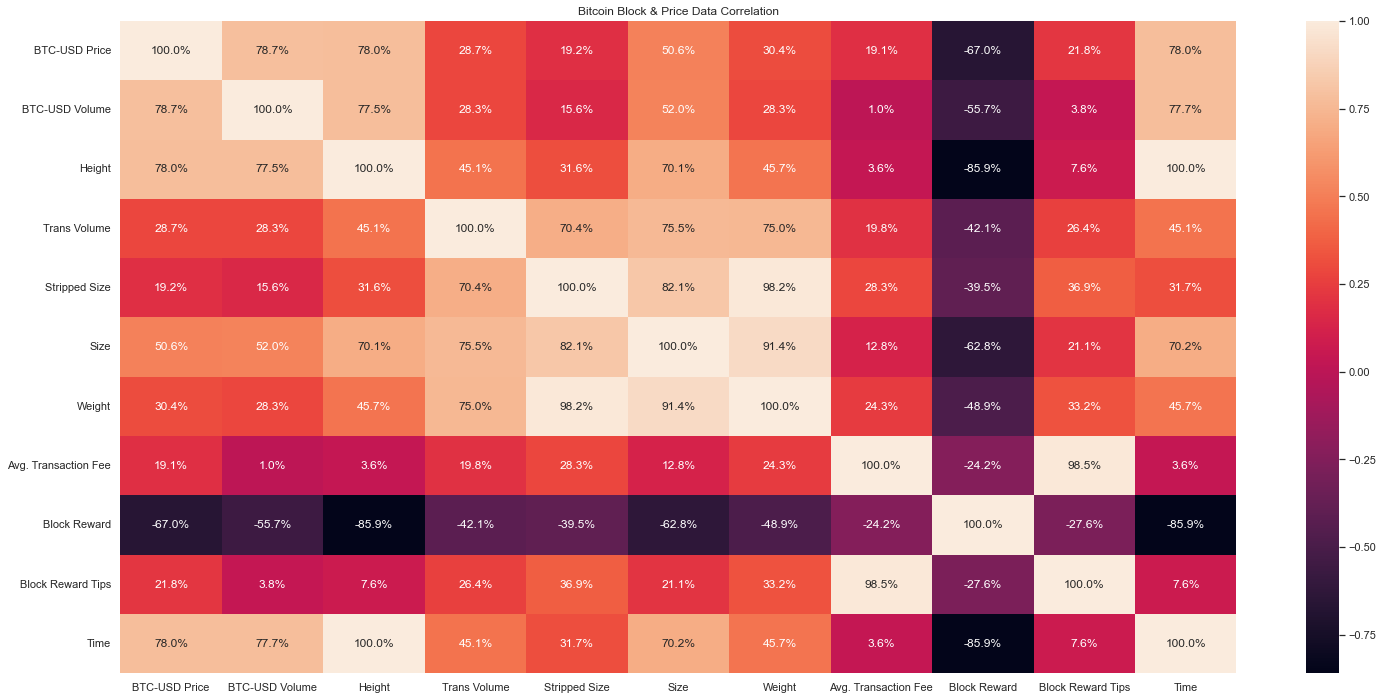

In [102]:
plt.subplots(figsize= (25,12))
sns.heatmap(data=price_and_block_corr,
            annot= True,
            fmt= '.1%')
            # linewidth=0.5
plt.title("Bitcoin Block & Price Data Correlation")
plt.savefig("plots\\price_and_block_corr.jpg", dpi = 300)

### Min-Max Scale the data so we can better visualize the change over time

In [117]:
# Load binary files
price_and_block_concat = pk.load(open("binary\\price_and_block_concat_additional.p", "rb"))

#Scale the data
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 100))
scaled = min_max_scaler.fit_transform(price_and_block_concat)
price_and_block_scaled = pd.DataFrame(scaled, columns = price_and_block_concat.columns)
price_and_block_scaled = price_and_block_scaled.set_index(price_and_block_concat.index)

# Save the dataframe
pk.dump(price_and_block_scaled, open("binary\\price_and_block_additional_scaled.p", "wb" ))
price_and_block_scaled

C:\Users\larry\miniconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\larry\miniconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


,"(Open, BNB-USD)","(Open, BTC-USD)","(Open, DOGE-USD)","(Open, ETH-USD)","(Open, LTC-USD)","(Volume, BNB-USD)","(Volume, BTC-USD)","(Volume, DOGE-USD)","(Volume, ETH-USD)","(Volume, LTC-USD)",Height,Trans Volume,Stripped Size,Size,Weight,Avg. Transaction Fee,Block Reward,Block Reward Tips,Time
Date,,,,,,,,,,,,,,,,,,,
2014-09-17,NaN,0.711536,NaN,NaN,1.098592,NaN,0.012279,NaN,NaN,0.014395,0.000000,23.681354,60.296834,31.633502,60.296834,2.428940,100.0,1.467349,0.000000
2014-09-18,NaN,0.689365,NaN,NaN,1.092877,NaN,0.023167,NaN,NaN,0.022716,0.053840,7.575429,14.291915,7.497961,14.291915,3.082175,100.0,0.441780,0.043197
2014-09-19,NaN,0.608706,NaN,NaN,0.987243,NaN,0.025954,NaN,NaN,0.019094,0.105653,8.573909,23.558711,12.359597,23.558711,2.358608,100.0,0.556979,0.086393
2014-09-20,NaN,0.536239,NaN,NaN,0.887210,NaN,0.025098,NaN,NaN,0.027837,0.155151,19.926199,62.972624,33.037301,62.972624,2.296446,100.0,1.448778,0.129590
2014-09-21,NaN,0.569264,NaN,NaN,0.868736,NaN,0.016758,NaN,NaN,0.013613,0.206097,24.137183,50.549951,26.519999,50.549951,2.738685,100.0,1.387140,0.172786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-14,87.236346,91.471602,47.128010,79.649047,40.848615,46.661363,51.583550,12.483069,54.546911,45.965491,99.831533,32.016497,94.004103,61.554877,99.835620,12.461193,0.0,12.462512,99.827214
2021-01-15,91.023670,95.981621,51.919844,86.627875,42.170446,49.099765,54.944682,11.623362,58.807504,46.772510,99.874084,38.007380,88.685029,69.920263,99.832644,12.682490,0.0,12.683351,99.870410
2021-01-16,89.045373,90.231909,51.782936,82.787327,39.957048,52.786447,46.791093,7.520144,52.730838,39.921159,99.918951,59.062297,83.397762,78.243670,99.833520,12.572374,0.0,12.573624,99.913607


In [159]:
# Load binary files
price_and_block_concat = pk.load(open("binary\\price_and_block_concat.p", "rb"))

#Scale the data
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 100))
scaled = min_max_scaler.fit_transform(price_and_block_concat)
price_and_block_scaled = pd.DataFrame(scaled, columns = price_and_block_concat.columns)
price_and_block_scaled = price_and_block_scaled.set_index(price_and_block_concat.index)

# Save the dataframe
pk.dump(price_and_block_scaled, open("binary\\price_and_block_scaled.p", "wb" ))
price_and_block_scaled

,BTC-USD Price,BTC-USD Volume,Height,Trans Volume,Stripped Size,Size,Weight,Avg. Transaction Fee,Block Reward,Block Reward Tips,Time
Date,,,,,,,,,,,
2014-09-17,0.711536,0.012279,0.000000,23.681354,60.296834,31.633502,60.296834,2.428940,100.0,1.467349,0.000000
2014-09-18,0.689365,0.023167,0.053840,7.575429,14.291915,7.497961,14.291915,3.082175,100.0,0.441780,0.043197
2014-09-19,0.608706,0.025954,0.105653,8.573909,23.558711,12.359597,23.558711,2.358608,100.0,0.556979,0.086393
2014-09-20,0.536239,0.025098,0.155151,19.926199,62.972624,33.037301,62.972624,2.296446,100.0,1.448778,0.129590
2014-09-21,0.569264,0.016758,0.206097,24.137183,50.549951,26.519999,50.549951,2.738685,100.0,1.387140,0.172786
...,...,...,...,...,...,...,...,...,...,...,...
2021-01-14,91.471602,51.583550,99.831533,32.016497,94.004103,61.554877,99.835620,12.461193,0.0,12.462512,99.827214
2021-01-15,95.981621,54.944682,99.874084,38.007380,88.685029,69.920263,99.832644,12.682490,0.0,12.683351,99.870410
2021-01-16,90.231909,46.791093,99.918951,59.062297,83.397762,78.243670,99.833520,12.572374,0.0,12.573624,99.913607


### Visualize Price (Scaled)

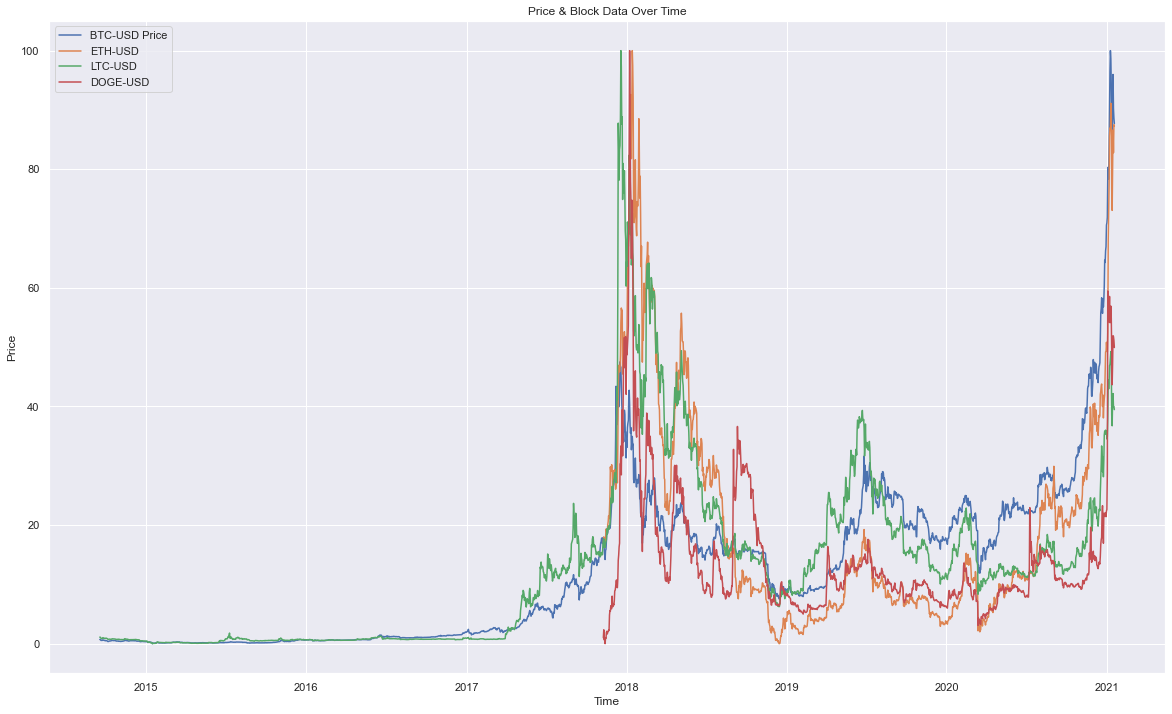

In [172]:
# Import data
price_and_block_additional_scaled = pk.load(open("binary\\price_and_block_additional_scaled.p", "rb" ))
price_and_block_additional_scaled.columns = [str(i) for i in price_and_block_additional_scaled.columns]

# Plot
plt.subplots(figsize= (20,12))

# Set theme
sns.set_theme(color_codes=True)

# Plot lines
sns.lineplot(x='Date', 
            y="('Open', 'BTC-USD')", 
            data=price_and_block_additional_scaled,
            label='BTC-USD Price')    

sns.lineplot(x='Date', 
            y="('Open', 'ETH-USD')", 
            data=price_and_block_additional_scaled,
            label='ETH-USD')    

sns.lineplot(x='Date', 
            y="('Open', 'LTC-USD')", 
            data=price_and_block_additional_scaled,
            label='LTC-USD')    

sns.lineplot(x='Date', 
            y="('Open', 'DOGE-USD')", 
            data=price_and_block_additional_scaled,
            label='DOGE-USD')    

# Add features
plt.title("Price & Block Data Over Time")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='upper left')

# Save 
plt.savefig("plots\\crypto_price_additional.jpg", dpi = 300)

# Show data
plt.show()

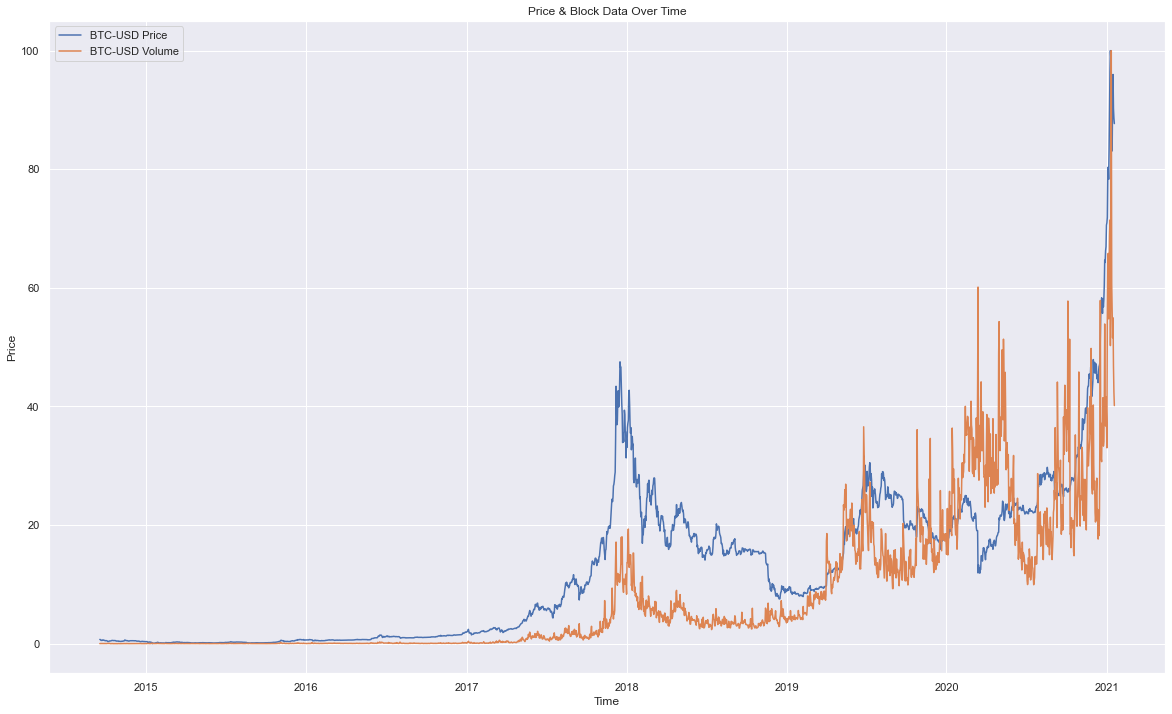

In [171]:
# Import data
price_and_block_additional_scaled = pk.load(open("binary\\price_and_block_additional_scaled.p", "rb" ))
price_and_block_additional_scaled.columns = [str(i) for i in price_and_block_additional_scaled.columns]

# Plot
plt.subplots(figsize= (20,12))

# Set theme
sns.set_theme(color_codes=True)

# Plot lines
sns.lineplot(x='Date', 
            y="('Open', 'BTC-USD')", 
            data=price_and_block_additional_scaled,
            label='BTC-USD Price')    

sns.lineplot(x='Date', 
            y="('Volume', 'BTC-USD')", 
            data=price_and_block_additional_scaled,
            label='BTC-USD Volume')    

# sns.lineplot(x='Date', 
#             y="('Volume', 'BTC-USD')", 
#             data=price_and_block_additional_scaled,
#             label='BTC-USD Volume')    

# sns.lineplot(x='Date', 
#             y="('Volume', 'BTC-USD')", 
#             data=price_and_block_additional_scaled,
#             label='BTC-USD Volume')    

# sns.lineplot(x='Date', 
#             y="('Volume', 'BTC-USD')", 
#             data=price_and_block_additional_scaled,
#             label='BTC-USD Volume')    

# Add features
plt.title("Price & Block Data Over Time")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='upper left')

# Save 
plt.savefig("plots\\crypto_price.jpg", dpi = 300)

# Show data
plt.show()

### Visualize Block data (Scaled)

In [142]:

price_and_block_scaled = pk.load(open("binary\\price_and_block_scaled.p", "rb" ))
for i in price_and_block_scaled:
    print(i)

BTC-USD Price
BTC-USD Volume
Height
Trans Volume
Stripped Size
Size
Weight
Avg. Transaction Fee
Block Reward
Block Reward Tips
Time


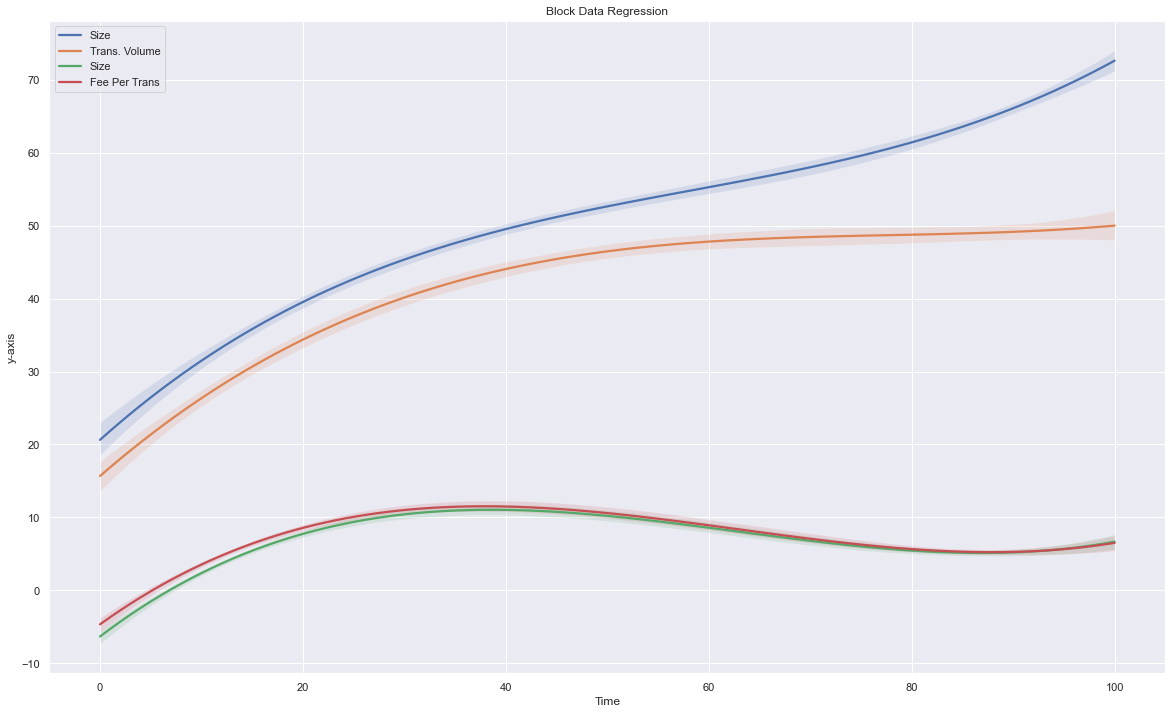

In [156]:
price_and_block_scaled = pk.load(open("binary\\price_and_block_scaled.p", "rb" ))

plt.subplots(figsize= (20,12))

sns.set_theme(color_codes=True)

sns.regplot(x='Height',
            y='Size',
            data=price_and_block_scaled,
            label='Size',
            scatter=False,
            order=3)    

sns.regplot(x='Height',
            y='Trans Volume',
            data=price_and_block_scaled,
            label='Trans. Volume',
            scatter=False,
            order=3)    

sns.regplot(x='Height', 
            y='Block Reward Tips', 
            data=price_and_block_scaled,
            label='Size',
            scatter=False,
            order=3)    

sns.regplot(x='Height',
            y='Avg. Transaction Fee',
            data=price_and_block_scaled,
            label='Fee Per Trans',
            scatter=False,
            order=3)    

# sns.lineplot(x='Height',
#             y='Bitcoin',
#             data=price_and_block_scaled,
#             label='Bitcoin Searches',
#             linestyle="dashed")

# sns.lineplot(x='Height',
#             y='Ethereum',
#             data=price_and_block_scaled,
#             label='Ethereum Searches',
#             linestyle="dashed")    

plt.title("Block Data Regression")
plt.xlabel('Time')
plt.ylabel('y-axis')
# plt.ylim([0, 100])

plt.legend(loc='upper left')

# Save plot
plt.savefig("plots\\block_and_search_data_regression.jpg", dpi = 300)
plt.show()

### Visualize Price and Block data (Scaled)

In [151]:
price_and_block_scaled = pk.load(open("binary\\price_and_block_scaled.p", "rb" ))
price_and_block_scaled

,BTC-USD Price,BTC-USD Volume,Height,Trans Volume,Stripped Size,Size,Weight,Avg. Transaction Fee,Block Reward,Block Reward Tips,Time
Date,,,,,,,,,,,
2014-09-17,0.711536,0.012279,0.000000,23.681354,60.296834,31.633502,60.296834,2.428940,100.0,1.467349,0.000000
2014-09-18,0.689365,0.023167,0.053840,7.575429,14.291915,7.497961,14.291915,3.082175,100.0,0.441780,0.043197
2014-09-19,0.608706,0.025954,0.105653,8.573909,23.558711,12.359597,23.558711,2.358608,100.0,0.556979,0.086393
2014-09-20,0.536239,0.025098,0.155151,19.926199,62.972624,33.037301,62.972624,2.296446,100.0,1.448778,0.129590
2014-09-21,0.569264,0.016758,0.206097,24.137183,50.549951,26.519999,50.549951,2.738685,100.0,1.387140,0.172786
...,...,...,...,...,...,...,...,...,...,...,...
2021-01-14,91.471602,51.583550,99.831533,32.016497,94.004103,61.554877,99.835620,12.461193,0.0,12.462512,99.827214
2021-01-15,95.981621,54.944682,99.874084,38.007380,88.685029,69.920263,99.832644,12.682490,0.0,12.683351,99.870410
2021-01-16,90.231909,46.791093,99.918951,59.062297,83.397762,78.243670,99.833520,12.572374,0.0,12.573624,99.913607


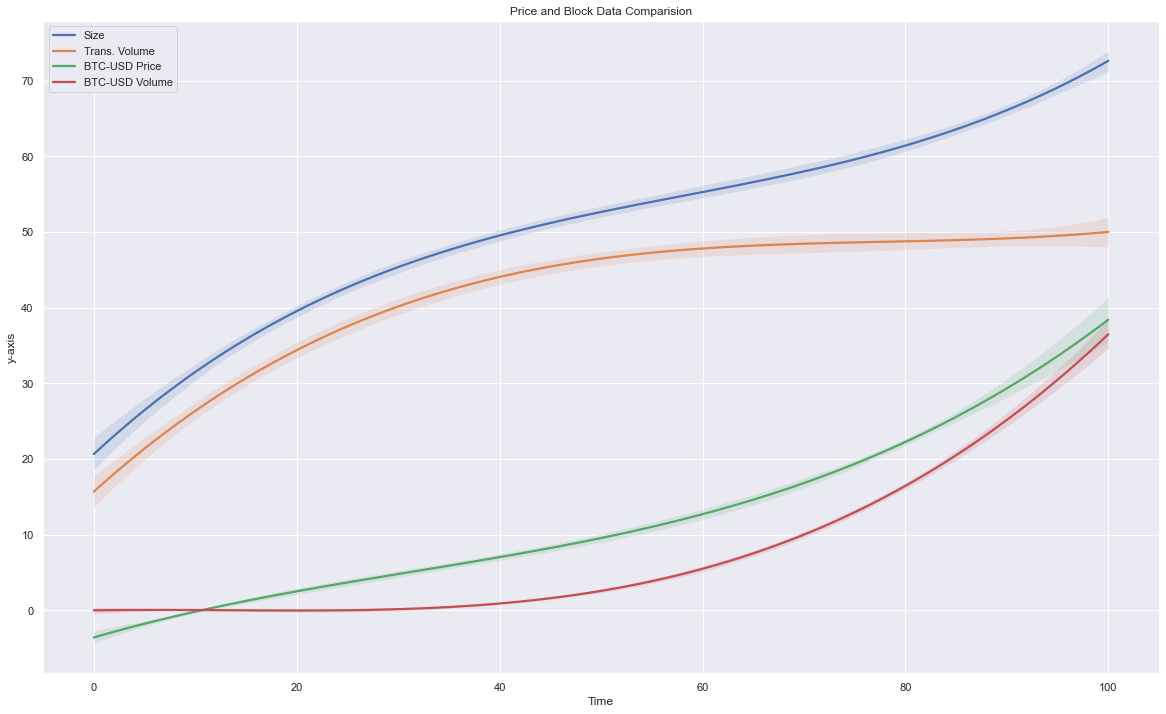

In [173]:
# Import data
price_and_block_scaled = pk.load(open("binary\\price_and_block_scaled.p", "rb" ))

# Plot
plt.subplots(figsize= (20,12))

# Set theme
sns.set_theme(color_codes=True)

# Plot lines
sns.regplot(x='Height',
            y='Size',
            data=price_and_block_scaled,
            label='Size',
            scatter=False,
            order=3)    

sns.regplot(x='Height',
            y='Trans Volume',
            data=price_and_block_scaled,
            label='Trans. Volume',
            scatter=False,
            order=3)    

sns.regplot(x='Height',
            y='BTC-USD Price',
            data=price_and_block_scaled,
            label='BTC-USD Price',
            scatter=False,
            # linestyle="dashed",
            order=3)    

sns.regplot(x='Height',
            y='BTC-USD Volume',
            data=price_and_block_scaled,
            label='BTC-USD Volume',
            scatter=False,
            # linestyle="dashed",
            order=3)    

# Save 
plt.title("Price and Block Data Comparision")
plt.xlabel('Time')
plt.ylabel('y-axis')
# plt.ylim([0, 100])

plt.legend(loc='upper left')
plt.savefig("plots\\price_and_block_data_regression_and_regression.jpg", dpi = 300)

# Show data
plt.show()

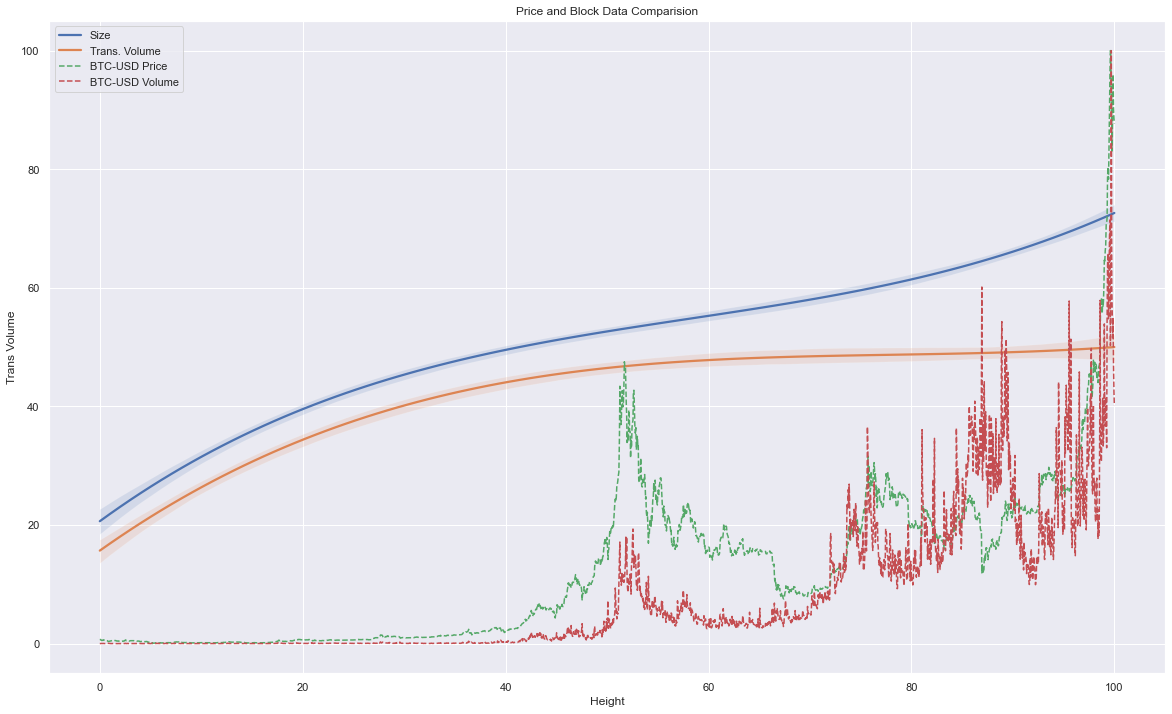

In [166]:
# Import data
price_and_block_scaled = pk.load(open("binary\\price_and_block_scaled.p", "rb" ))

# Plot
plt.subplots(figsize= (20,12))

# Set theme
sns.set_theme(color_codes=True)

# Plot lines
sns.regplot(x='Height',
            y='Size',
            data=price_and_block_scaled,
            label='Size',
            scatter=False,
            order=3)    

sns.regplot(x='Height',
            y='Trans Volume',
            data=price_and_block_scaled,
            label='Trans. Volume',
            scatter=False,
            order=3)    

sns.lineplot(x='Height',
            y='BTC-USD Price',
            data=price_and_block_scaled,
            label='BTC-USD Price',
            linestyle="dashed")

sns.lineplot(x='Height',
            y='BTC-USD Volume',
            data=price_and_block_scaled,
            label='BTC-USD Volume',
            linestyle="dashed")    

# Save 
plt.title("Price and Block Data Comparision")
plt.savefig("plots\\price_and_block_data_regression_and_line.jpg", dpi = 300)

# Show data
plt.show()

### Import the original datasets

In [ ]:
# Crypto Search Data
og_search_data = pk.load(open("og_data_binary\\og_search_data.p", "rb"))

In [ ]:
# Set the keyword & timeframe
keywords = ["Bitcoin", "Ethereum","Binance Coin"]
pt.build_payload(keywords, timeframe="all")

# Get the interest over time
crypto_search_data = pt.interest_over_time()

# Save search data as pickled pandas datafame and .csv file
pk.dump(crypto_search, open( "search_and_price\\crypto_search_data.p", "wb" ) )

In [ ]:
# Import yfinance package
import yfinance as yf
crypto_price = yf.download("BTC-USD ETH-USD BNB-USD", start="2009-01-01", end="2022-05-01",interval = "1d")

# Save price data as pickled pandas datafame and .csv file
pk.dump(crypto_price, open( "search_and_price\\crypto_price_data.p", "wb" ) )
crypto_price

### Match the date range for both datasets

In [ ]:
# Match the indexes
for i in crypto_search_data.index:
    if int(str(i)[2:4]) < 14:
        crypto_search_data.drop(i, inplace=True)
    if str(i)[2:4] == '14' and int(str(i)[5:7]) < 10:
        crypto_search_data.drop(i, inplace=True)

# Drop the column
new_search_data = crypto_search_data.drop('isPartial',inplace=False,axis=1)

# Save the dataframe
pk.dump(new_search_data, open("search_and_price\\new_search_data.p", "wb"))

In [ ]:
# Load Binary file
crypto_price_data = pk.load(open("search_and_price\\crypto_price_data.p", "rb"))

# Match the indexes
for i in crypto_price_data.index:
    if str(i)[8:10] != '01':
        crypto_price_data.drop(i, inplace=True)

# Save the dataframe
pk.dump(crypto_price_data, open("search_and_price\\crypto_price_data.p", "wb"))

### Check that the data was cleaned and saved correctly

In [ ]:
pk.load(open("search_and_price\\crypto_price_data.p", "rb"))

In [ ]:
pk.load(open("search_and_price\\new_search_data.p", "rb"))

### Concatenate Search and Price Data

In [ ]:
price_data = pk.load(open("search_and_price\\crypto_price_data.p", "rb"))
search_data = pk.load(open("search_and_price\\new_search_data.p", "rb"))
search_data.drop(search_data.index[-1], inplace=True)
search_data

# Iterate over the price_data columns and drop the columns that do not have the string "Close" in them
for i in price_data.columns:
    if "Close" not in i:
        price_data.drop(i, inplace=True, axis=1)

# Concatendate the two dataframes
search_and_price_concat = pd.concat([search_data,price_data],axis=1)

# Add a column to the dataframe that contains the length of the dataframe
search_and_price_concat['Length'] = [i for i in range(len(search_and_price_concat.index))]

# Save the dataframe
pk.dump(search_and_price_concat, open("search_and_price\\search_and_price_concat.p", "wb"))
search_and_price_concat

### Calculate the correlation between the data points

In [ ]:
# Calculate the correlation
search_and_price_corr = search_and_price_concat.corr(method='pearson')

# Save the dataframe
pk.dump(search_and_price_corr, open("search_and_price\\search_and_price_corr.p", "wb"))

### Visualize the correlation as a heat map

In [ ]:
plt.subplots(figsize= (25,12))
sns.heatmap(search_and_price_corr, annot= True, fmt= '.2%')
plt.title("Bitcoin Price & Search Data")
plt.savefig("search_and_price\\search_and_price_corr.jpg", dpi = 300)

### Min-Max Scale the data so we can better visualize the change over time

In [ ]:
#Scale the data
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 100))
scaled = min_max_scaler.fit_transform(search_and_price_concat)
search_and_price_scale = pd.DataFrame(scaled, columns = search_and_price_concat.columns)
search_and_price_scale = search_and_price_scale.set_index(search_and_price_concat.index)

# Save the dataframe
search_and_price_scale.to_csv("search_and_price\\search_and_price_scale.csv")
search_and_price_scale.to_pickle("search_and_price\\search_and_price_scale.p")

# Show the plot
search_and_price_scale



### Visualize Price and Search data (Unscaled)

In [ ]:
# Create subplots
fig, ax = plt.subplots()
line1, = ax.plot(search_and_price_concat['Bitcoin'], label="BTC-UDS")
line2, = ax.plot(search_and_price_concat['Ethereum'], label="ETH-USD")
line3, = ax.plot(search_and_price_concat['Binance Coin'], label="BNB-USD")

# Create a legend for the plot
first_legend = ax.legend(handles=[line1,line2,line3], loc='upper left')

# Add the legend manually to the Axes.
ax.add_artist(first_legend)

# Label the x and y axis
plt.xlabel("Time")
plt.ylabel("y-axis")

# Add a title to the plot
plt.title("Bitcoin Price & Search Data")

# Save the plot to present directory
plt.rcParams["figure.figsize"] = (20,12)
plt.savefig("search_and_price\\search_and_price_data_unsacled.jpg", dpi = 300)

# Show the plot
plt.show()


### Visualize Price and Search data (Scaled)

In [ ]:
# Create subplots
fig, ax = plt.subplots()
line1, = ax.plot(search_and_price_scale['Ethereum'], label="Ethereum Searches")
line2, = ax.plot(search_and_price_scale[('Close','BTC-USD')], label="BTC-USD")
# line3, = ax.plot(search_and_price_scale[('Close','BNB-USD')], label="BNB-USD")
# line4, = ax.plot(search_and_price_scale[('Close','ETH-USD')], label="ETH-USD")

# Create a legend for the plot
first_legend = ax.legend(handles=[line1,line2], loc='upper left')

# Add the legend manually to the Axes.
ax.add_artist(first_legend)

# Label the x and y axis
plt.xlabel("Time")
plt.ylabel("y-axis")

# Add a title to the plot
plt.title("Bitcoin Price & Search Data")

# Save the plot to present directory
plt.rcParams["figure.figsize"] = (20,12)
plt.savefig("search_and_price\\search_and_price_data_scaled.jpg", dpi = 300)

# Show the plot
plt.show()

In [ ]:
plt.subplots(figsize= (20,12))
plt.title("Dogecoin Search and Price correlation")
sns.set_theme(color_codes=True)
sns.regplot(x='Time', y='Open', data=test_scaled)    
sns.regplot(x='Time', y='Dogecoin', data=test_scaled)    
# plt.legend(labels=["Open","Dogecoin"])
# sns.lmplot(x="height", y=i, data=test, x_jitter=.05)
# plt.savefig(f"block_and_search\\weight_reg.jpg", dpi = 300)

In [ ]:
# Generate data
# x = rng.uniform(0, 10, size=100)
# y = x + rng.normal(size=100)

# Initialize layout
fig, ax = plt.subplots(figsize = (20, 12))
plt.subplots(figsize= (20,12))

x = search_and_price_concat['Length']
y = search_and_price_concat['Ethereum']

ax = sns.regplot(x="Length", y="Ethereum", data=search_and_price_concat)
ax = sns.regplot(x="Length", y="Ethereum", data=search_and_price_concat)



In [ ]:
# Plot BTC Volume
btc['Volume'].plot(figsize=(10, 6))
# Label the x and y axis
plt.xlabel("Date")
plt.ylabel("Price")
# Save the plot to present directory
plt.savefig("plots\\btc_volume.png")

In [ ]:
# initialize a new Google Trends Request Object
pt = TrendReq(hl="en-US", tz=360)
# set the keyword & timeframe
keywords = ["Coinbase", "Binance"]
pt.build_payload(keywords, timeframe="all")
# get the interest over time
exch_iot = pt.interest_over_time()
# Save iot as a .csv file in the current directory
exch_iot.to_csv("data\\exch_iot.csv")
exch_iot

In [ ]:
# Create subplots
fig, ax = plt.subplots()
line1, = ax.plot(exch_iot['Coinbase'].truncate(before=list(exch_iot.index)[145]), label="Coinbase")
line2, = ax.plot(exch_iot['Binance'].truncate(before=list(exch_iot.index)[145]), label="Binance")

# Create a legend for the plot
first_legend = ax.legend(handles=[line1,line2], loc='upper left')

# Add the legend manually to the Axes.
ax.add_artist(first_legend)

# Label the x and y axis
plt.xlabel("Date")
plt.ylabel("Relative Interest")

# Add a title to the plot
plt.title("Crypto Exchange Interest Over Time")

# Save the plot to present directory
plt.rcParams["figure.figsize"] = (20,12)
plt.savefig("plots\\exch_iot.jpg", dpi = 300)

# Show the plot
plt.show()


In [ ]:
# Plot BTC Volume
btc['High'].plot(figsize=(10, 6))
# Label the x and y axis
plt.xlabel("Date")
plt.ylabel("Price")
# Save the plot to present directory
plt.savefig("plots\\btc_volume.png")

In [ ]:
# the keyword to extract data
keyword = ["Bitcoin"]
pt.build_payload(keyword, timeframe="all")
# get the interest by country
ibr = pt.interest_by_region("COUNTRY", inc_low_vol=True, inc_geo_code=True)
# Convert the series ibr to pandas dataframe
ibr = pd.DataFrame(ibr)
# Sort the dataframe by the value of the column "Bitcoin"
ibr.sort_values("Bitcoin", inplace=True, ascending=False)
# Save the dataframe to a csv file
ibr.to_csv("data\\ibr.csv")
ibr